# Thompson Sampling

## Importing the libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [4]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [23]:
import random

# number of rows/tests
N = 10000
# number of methods (columns)
d = 10

# which method(ad) got chosen
ads_selected = []

# How many times did each method win?
numbers_of_rewards_1 = [0] * d
# How many times did each methods lose?
numbers_of_rewards_0 = [0] * d
# what is the total reward acheived by the algorithm
# this is the success measure
total_reward = 0
res_array = [[]]
for n in range(0, N):
    # which method(ad will be used this round?
    ad = 0
    # Which had the best result from the beta disrtibution? (our pseudo distribution for Thompson algorithm)
    max_random = 0
    for i in range(0, d):
        #selects a random number from the beta distribution https://en.wikipedia.org/wiki/Beta_distribution
        # beta distribution is the distribution of the probability of the probability!
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        # Was the result the best of the group (the code above will be executed for all methods)
        if random_beta > max_random:
            #if it beats the current best replace the max value
            max_random = random_beta
            #set the method(ad) tested to the best one
            ad = i
    #update the method selection list
    ads_selected.append(ad)
    # check the columns in row n to see what the REAL result was
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    res_array.append([n,ad,max_random,reward, total_reward])   
    total_reward = total_reward + reward

In [25]:
df = pd.DataFrame(res_array, columns = ['round','method used','value from beta distribution','reward','total reward so far'])

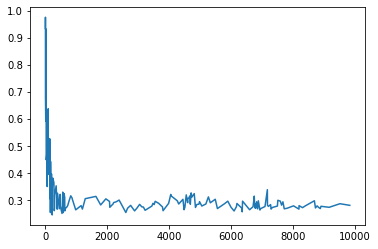

In [33]:
z = 1
plt.plot(df[df['method used']==z]['round'],df[df['method used']==z]['value from beta distribution'])

## Visualising the results - Histogram

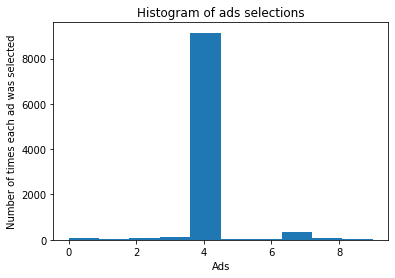

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

In [34]:
total_reward

2606